## <div align="center"> Project UAS IS388 Data Analysis </div>
## <div align="center"> [Student Performance Factor - Regression]</div>
#### <div align="center"> Semester Ganjil 2023/2024 </div>
---

In [3]:
import datetime
import uuid

studentName = "Ariadesta Rasyad Aulia"
studentNIM = "00000104837"
studentClass = "IS388"

In [5]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(studentName))
print("NIM: \t\t{}".format(studentNIM))
print("NIM: \t\t{}".format(studentClass))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Ariadesta Rasyad Aulia
NIM: 		00000104837
NIM: 		IS388
Start: 		2024-12-03 10:55:18.332173
Device ID: 	6930c683-b12a-11ef-8e90-e359e368e8d7


### Explatory Data Analysis

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv("StudentPerformanceFactors.csv")

In [39]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [43]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Handling Missing Values

In [92]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [94]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_12448\1184130705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12448\1184130705.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [96]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Mengelompokkan data Categorical

In [55]:
numerical_col=[col for col in df.columns if df[col].dtype!='object']
categorical_col=[col for col in df.columns if df[col].dtype=='object']
categorical_col

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

### Data Visualisation

C:\Users\USER\AppData\Local\Temp\ipykernel_12448\2601180522.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Exam_Score'],  bins=100, hist_kws={'alpha': 0.4});


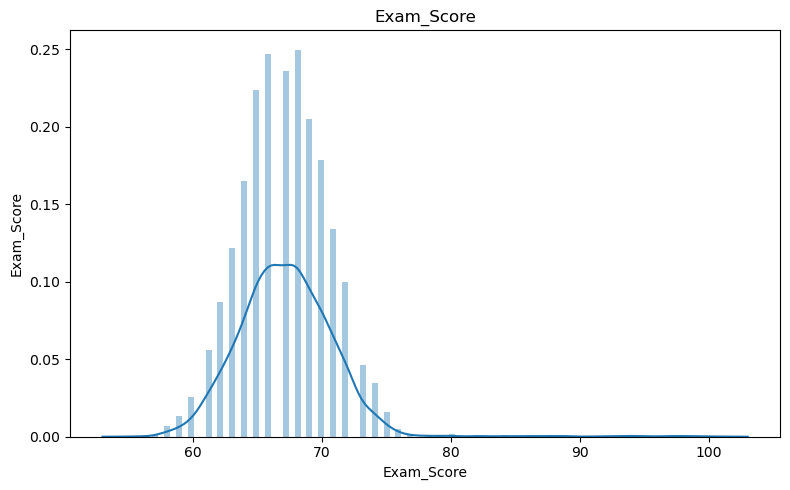

In [49]:
plt.figure(figsize=(8, 5))
sns.distplot(df['Exam_Score'],  bins=100, hist_kws={'alpha': 0.4});
plt.title('Exam_Score')
plt.xlabel('Exam_Score')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()

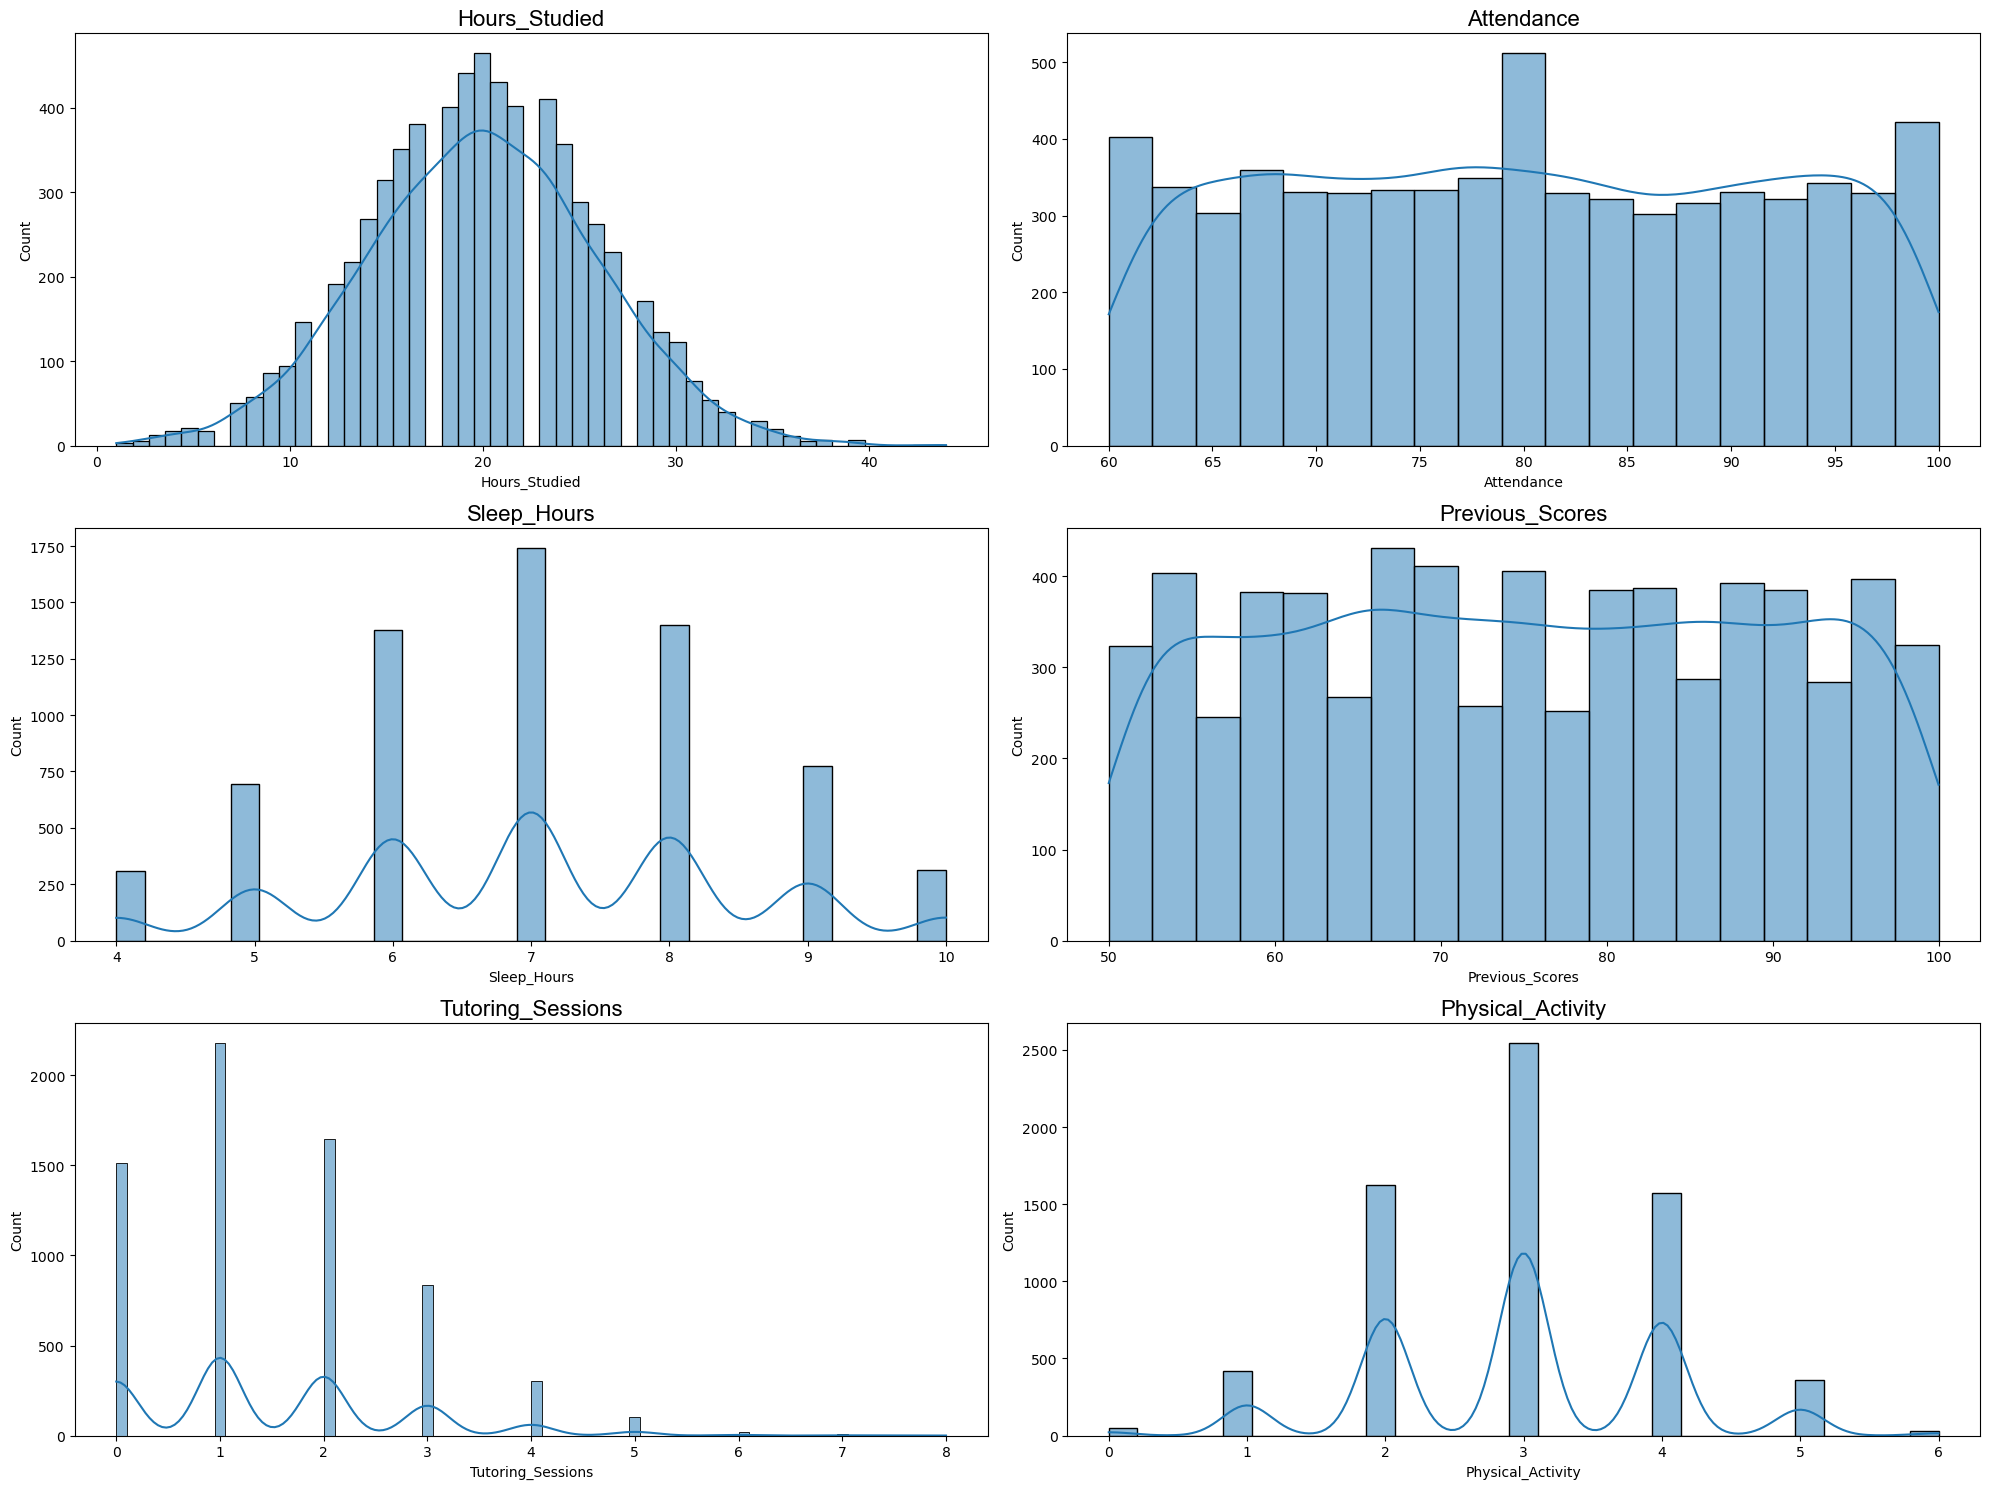

In [60]:
plt.figure(figsize=(20,15))
for i in range(len(numerical_col)-1):
    plt.subplot(3,2,i+1)
    sns.histplot(df[numerical_col[i]],kde=True)
    plt.title(numerical_col[i], fontdict={'fontname': 'Arial'}, fontsize=16)
plt.tight_layout()
plt.show()

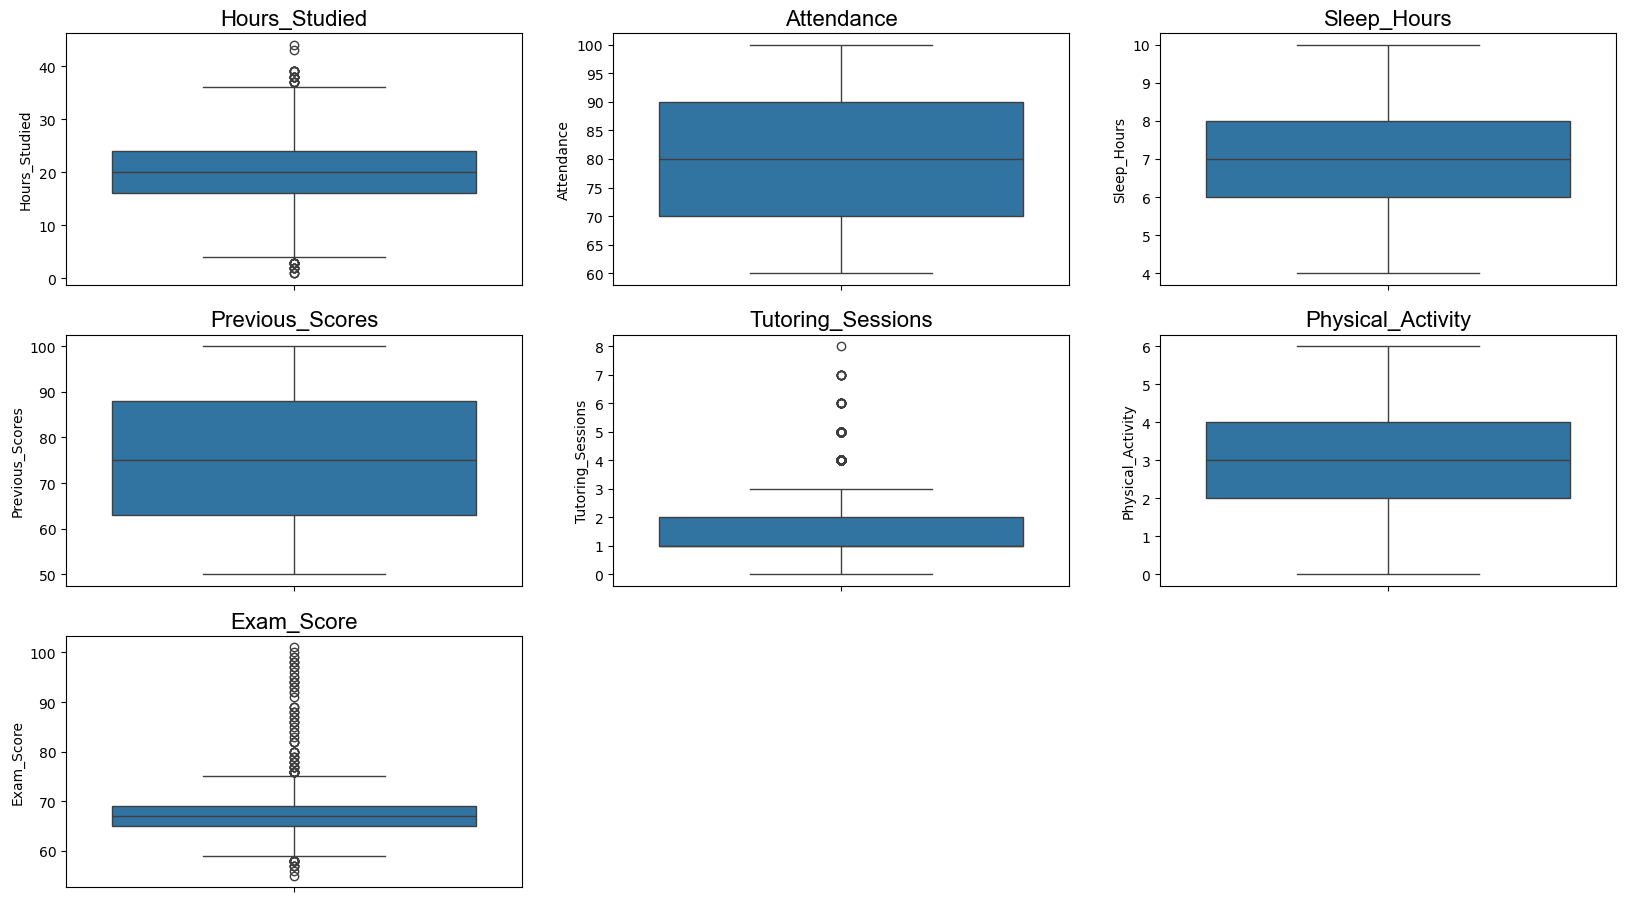

In [64]:
plt.figure(figsize=(20,15))
for i in range(len(numerical_col)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=df[numerical_col[i]])
    plt.title(numerical_col[i], fontdict={'fontname': 'Arial'}, fontsize=16)
# plt.tight_layout()
plt.show()

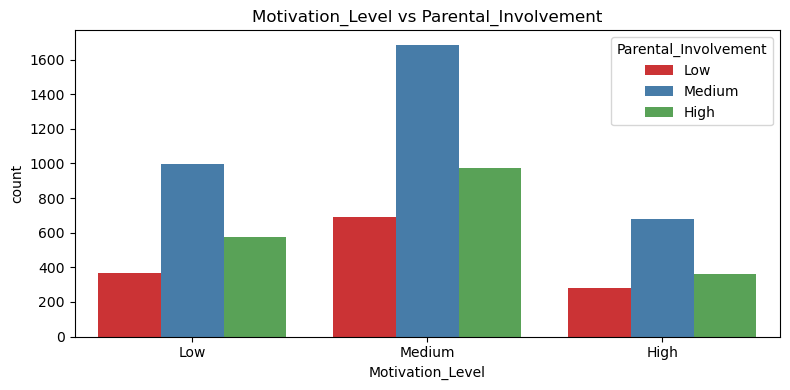

In [86]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Motivation_Level'],hue=df['Parental_Involvement'],palette='Set1')
plt.title('Motivation_Level vs Parental_Involvement')
plt.tight_layout()

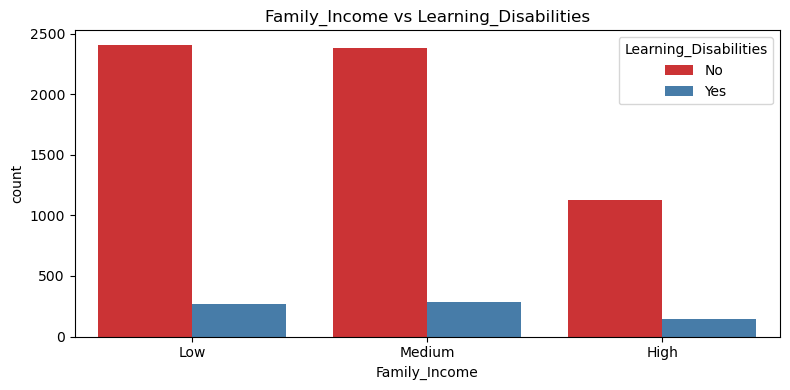

In [84]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Family_Income'],hue=df['Learning_Disabilities'],palette='Set1')
plt.title('Family_Income vs Learning_Disabilities')
plt.tight_layout()

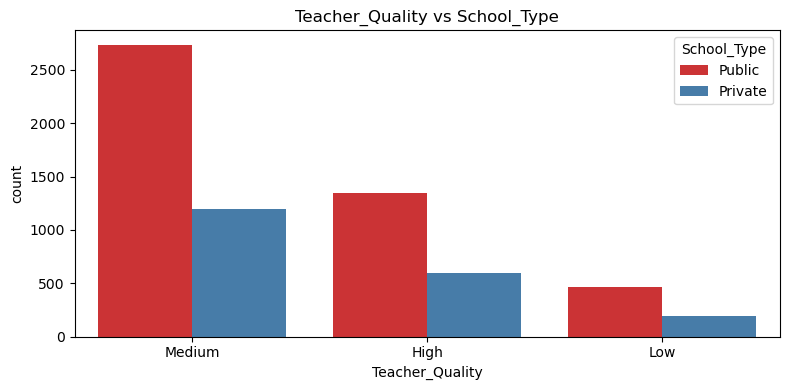

In [82]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Teacher_Quality'],hue=df['School_Type'],palette='Set1')
plt.title('Teacher_Quality vs School_Type')
plt.tight_layout()

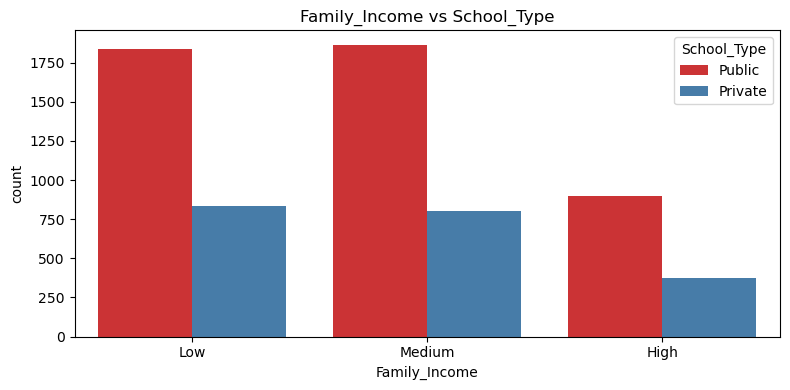

In [76]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Family_Income'],hue=df['School_Type'],palette='Set1')
plt.title('Family_Income vs School_Type')
plt.tight_layout()

### Handling Outliers

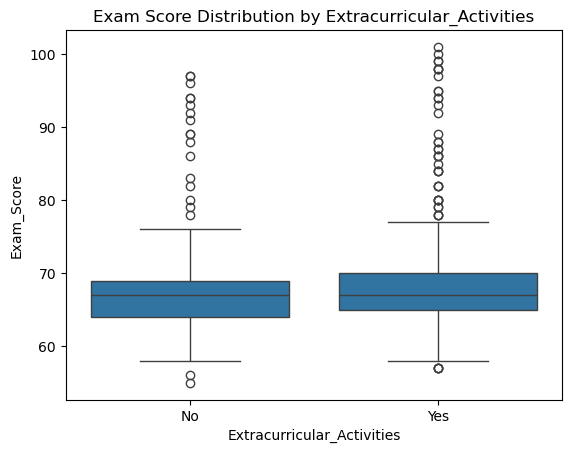

In [4]:
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=df)
plt.title('Exam Score Distribution by Extracurricular_Activities')
plt.show()

In [5]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data to remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

In [6]:
filtered_data = remove_outliers_iqr(df, 'Exam_Score')

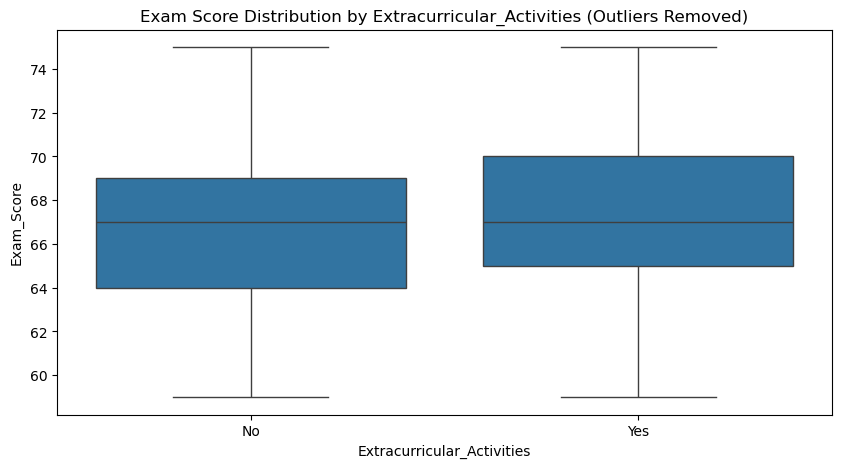

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=filtered_data)
plt.title('Exam Score Distribution by Extracurricular_Activities (Outliers Removed)')
plt.show()

In [88]:
integer_columns = df.select_dtypes(include=['int64'])

# Display the resulting DataFrame with only integer columns
print(integer_columns.head())

   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             23          84            7               73                  0   
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   

   Physical_Activity  Exam_Score  
0                  3          67  
1                  4          61  
2                  4          74  
3                  4          71  
4                  4          70  


<Axes: >

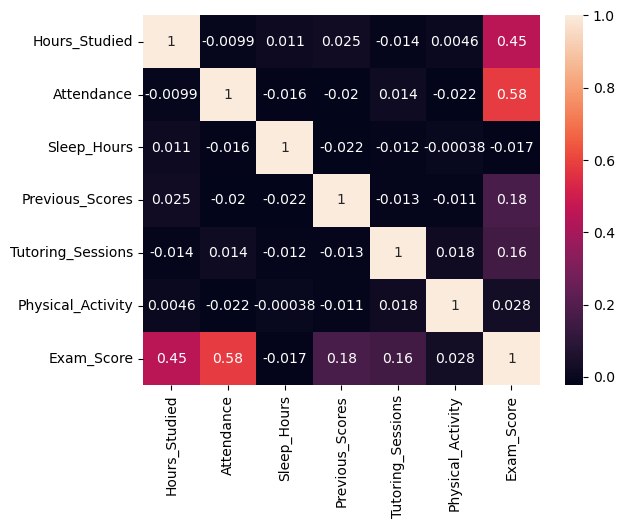

In [90]:
sns.heatmap(integer_columns.corr(), annot=True)

### Data Tranformation

In [105]:
dummy=pd.get_dummies(df[categorical_col],drop_first=True)
dummy.shape

(6607, 21)

In [107]:
df.drop(columns=categorical_col,inplace=True)
df=pd.concat([df,dummy],axis=1)

In [111]:
df.shape

(6607, 28)

### Splitting The Data

In [116]:
x=df.drop('Exam_Score',axis=1)
y=df['Exam_Score']

In [124]:
scalar=MinMaxScaler()
x=scalar.fit_transform(x)

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [130]:
print(x_train.shape)
print(x_test.shape)

(5615, 27)
(992, 27)


## Modeling

### Linear Regression with Mean Squared Error (MSE)

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

In [180]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("mean_squared_error: ",mse(y_test, y_pred))
print("train_score: ",lr.score(x_train,y_train))
print("test_score: ",lr.score(x_test,y_test))

mean_squared_error:  2.9147594191497945
train_score:  0.7155379328418771
test_score:  0.7970007903200627


### Linear Regression with Mean Absolute Error (MAE)

In [165]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("mean_absolute_error: ",mae(y_test, y_pred))
print("train_score: ",lr.score(x_train,y_train))
print("test_score: ",lr.score(x_test,y_test))

mean_absolute_error:  0.4474457760401752
train_score:  0.7155379328418771
test_score:  0.7970007903200627


### Linear Regression With R Squared Score

In [182]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("mean_absolute_error: ",r2(y_test, y_pred))
print("train_score: ",lr.score(x_train,y_train))
print("test_score: ",lr.score(x_test,y_test))

mean_absolute_error:  0.7970007903200627
train_score:  0.7155379328418771
test_score:  0.7970007903200627


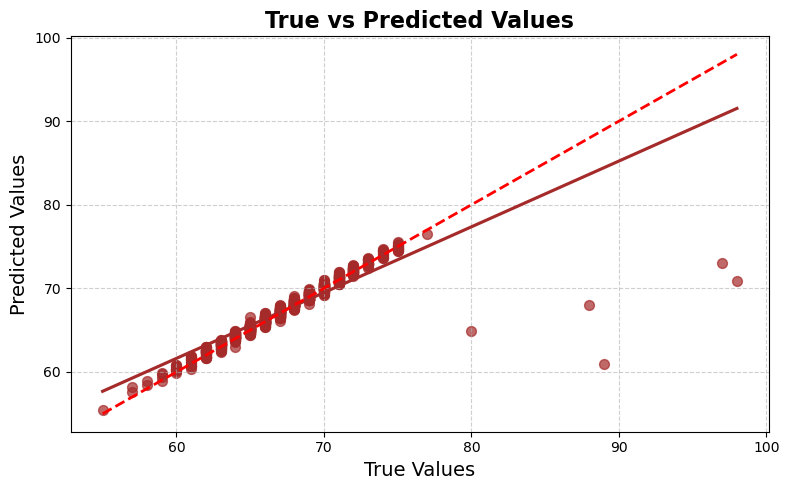

In [141]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### Random Forest with Mean Squared Error (MSE)

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("mean_squared_error: ",mse(y_test, y_pred))
print("train_score: ",rf.score(x_train,y_train))
print("test_score: ",rf.score(x_test,y_test))

mean_squared_error:  4.672133165322581
train_score:  0.9417002244851046
test_score:  0.6746080194994075


### Random Forest with Mean Absolute Error (MAE)

In [191]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("mean_squared_error: ",mae(y_test, y_pred))
print("train_score: ",rf.score(x_train,y_train))
print("test_score: ",rf.score(x_test,y_test))

mean_squared_error:  1.190352822580645
train_score:  0.9442106074259599
test_score:  0.6660116587660283


### Random Forest with R Squared Score

In [192]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("mean_squared_error: ",r2(y_test, y_pred))
print("train_score: ",rf.score(x_train,y_train))
print("test_score: ",rf.score(x_test,y_test))

mean_squared_error:  0.6754324313536206
train_score:  0.941663510740085
test_score:  0.6754324313536206


## Visualization

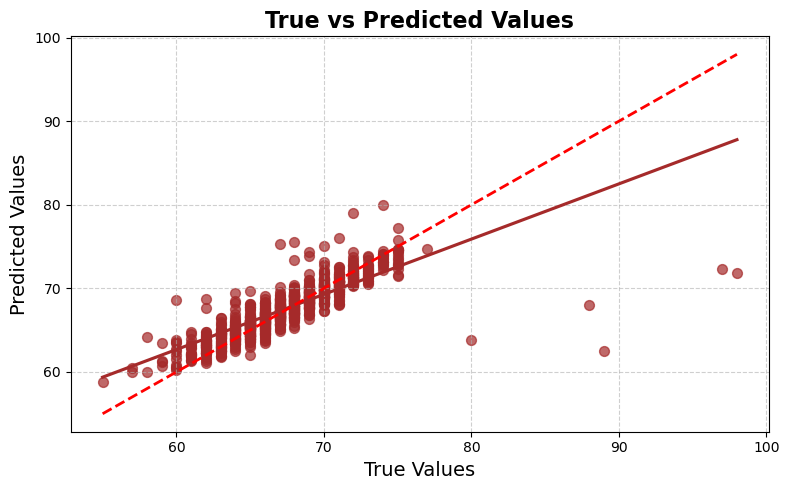

In [151]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## Model Comparision

### Mean Squared Error Comparision

In [197]:
acc=[]
names=['LinearRegression','RandomForest']
acc.extend([lr.score(x_test,y_test),rf.score(x_test,y_test)])
acc

[0.7970007903200627, 0.6754324313536206]

### Mean Absolute Error Comparision

In [7]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(studentName))
print("NIM: \t\t{}".format(studentNIM))
print("NIM: \t\t{}".format(studentClass))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Ariadesta Rasyad Aulia
NIM: 		00000104837
NIM: 		IS388
Start: 		2024-12-03 10:55:46.214601
Device ID: 	79cf4bdc-b12a-11ef-b81e-e359e368e8d7
